# **Using XGBoost, SMOTE, and threshold moving**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

**Data Visualization**

In [ ]:
dataDF = pd.read_csv(R'C:\Users\Richi Kothari\Downloads\archive\creditcard.csv')
dataDF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Plotting the distribution of class

<AxesSubplot:title={'center':'Class distribution of the target variable'}>

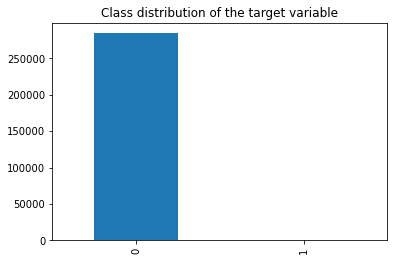

In [ ]:
value_counts = dataDF["Class"].value_counts()
value_counts.plot(kind="bar", title="Class distribution of the target variable")

Basic descriptive statistics for all attributes

In [ ]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
dataDF.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


Plotting the histograms for all input attributes to make sure nothing unusual stands out.


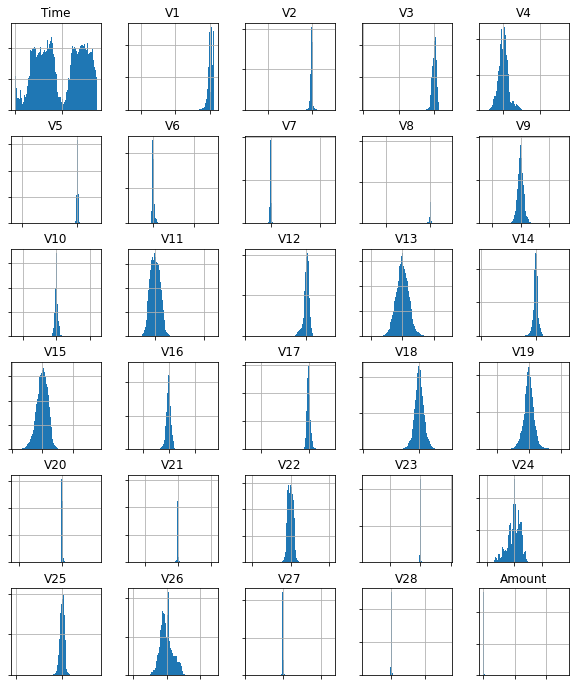

In [ ]:
ax = dataDF.drop("Class", axis=1).hist(figsize=(10,12),bins=100)
# We hide the axes' labels to make the plot neater and more compact 
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

The time is given in the form of timestamp. 
So, to find correlation between type of transaction and time we are converting timestamp to datetime object and plotting it via histograms.

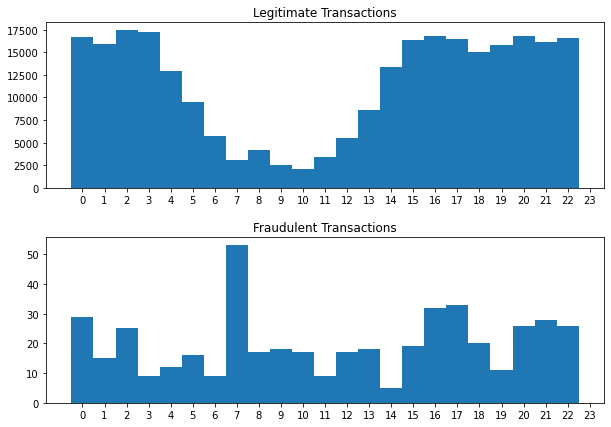

In [ ]:
dataDF["Hour"] = dataDF["Time"].apply(datetime.fromtimestamp).dt.hour
fig, ax = plt.subplots(2, figsize=(10,7))
for a in ax:
    a.set_xticks(range(24))
dataDF.loc[dataDF["Class"] == 0]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid=False)
dataDF.loc[dataDF["Class"] == 1]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid=False)
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

Function to compare the basic statistics for a single attribute across the fraud/no-fraud classes.

In [ ]:
def compare_leg_fraud(attribute):
    leg_trS = dataDF.loc[dataDF["Class"] == 0][attribute].rename("Legitimate").describe()
    frd_trS = dataDF.loc[dataDF["Class"] == 1][attribute].rename("Fraudulent").describe()
    tr_hourDF = leg_trS.to_frame().join(frd_trS.to_frame())
    return tr_hourDF
     
compare_leg_fraud("Hour")

,Legitimate,Fraudulent
count,284315.000,492.000
mean,12.349,12.136
std,7.805,7.227
min,0.000,0.000
25%,4.000,7.000
50%,15.000,12.500
75%,19.000,18.000
max,23.000,23.000


Distribution of fraudulent vs legitimate transactions against amount via histograms 

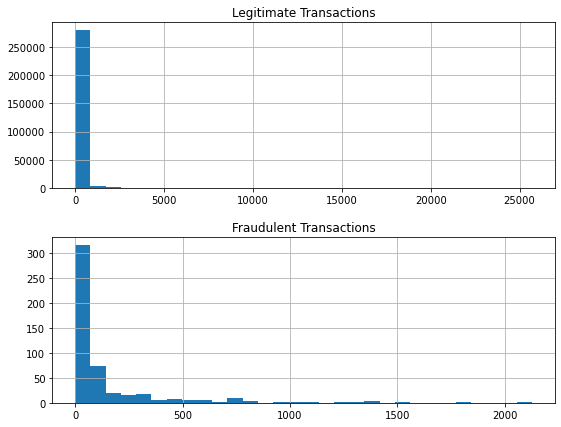

In [ ]:
fig, ax = plt.subplots(2, figsize=(9,7))
dataDF.loc[dataDF["Class"] == 0]["Amount"].hist(bins=30, ax=ax[0])
dataDF.loc[dataDF["Class"] == 1]["Amount"].hist(bins=30, ax=ax[1])
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

Basic statistics for the Amount attribute.

In [ ]:
compare_leg_fraud("Amount")

,Legitimate,Fraudulent
count,284315.000,492.000
mean,88.291,122.211
std,250.105,256.683
min,0.000,0.000
25%,5.650,1.000
50%,22.000,9.250
75%,77.050,105.890
max,25691.160,2125.870


The top 5 most frequent legitimate transactions.

In [ ]:
(dataDF.loc[dataDF["Class"] == 0]["Amount"].value_counts(normalize=True)*100).head()

1.000    4.775
1.980    2.126
0.890    1.714
9.990    1.669
15.000   1.154
Name: Amount, dtype: float64

The top 5 fraudulent transactions.

In [ ]:
(dataDF.loc[dataDF["Class"] == 1]["Amount"].value_counts(normalize=True)*100).head()

1.000    22.967
0.000     5.488
99.990    5.488
0.760     3.455
0.770     2.033
Name: Amount, dtype: float64

We see that nearly 23% of all fraudulent transactions amount to 1.0, where the percentage for the same transaction amount in the legitimate set is closer to 5%. We also see a large number of 0-value transactions, which is probably the result of a cardholder details verification transactions.